In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# 파일 경로
file_path = '../3. 군구_시간대, 연령대, 요일_음주운전_합계/군구별_시간대_음주운전_합계.csv'

# 데이터 로드
data = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0)

In [3]:
# 1. 데이터 준비: 군구별 합계를 특징으로 사용
features = data.copy()


In [4]:
# 2. 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [5]:

# 3. 엘보우 방법으로 최적의 클러스터 개수 결정
inertia = []
for k in range(1, 11):  # 클러스터 개수를 1~10까지 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


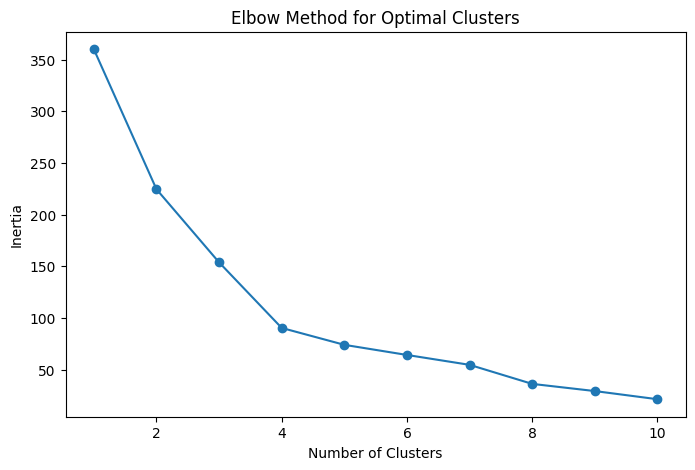

In [6]:

# 엘보우 방법 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [7]:

# 4. K-Means 클러스터링
optimal_k = 4  # 엘보우 방법 결과로 얻은 최적 클러스터 개수
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [8]:

# 5. 군집별 데이터 확인
print(data.groupby('Cluster').mean())


                  0       1           2      3          4          5  \
Cluster                                                                
0        102.666667   88.50   65.833333  50.50  48.833333  33.333333   
1        150.750000  133.00  116.500000  93.50  74.500000  61.000000   
2         88.000000   78.00   72.000000  40.00  32.000000  28.000000   
3         26.750000   30.75   26.000000  15.25  18.000000   9.250000   

                 6      7          8          9  ...         14         15  \
Cluster                                          ...                         
0        28.166667  24.50  18.833333  15.833333  ...  15.666667  10.166667   
1        58.500000  41.25  26.250000  27.250000  ...  23.250000  20.500000   
2        22.000000  21.00  12.000000  12.000000  ...  21.000000  21.000000   
3         8.500000  10.50   5.000000  15.000000  ...   8.750000   5.000000   

                16         17         18         19      20          21  \
Cluster                

In [9]:
# 군집별로 군구 확인
for cluster in range(optimal_k):  # optimal_k는 군집 수
    print(f"Cluster {cluster}에 포함된 군구:")
    print(data[data['Cluster'] == cluster].index.tolist())
    print("\n")


Cluster 0에 포함된 군구:
['강서구', '동래구', '북구', '사상구', '사하구', '연제구']


Cluster 1에 포함된 군구:
['금정구', '남구', '부산진구', '해운대구']


Cluster 2에 포함된 군구:
['기장군']


Cluster 3에 포함된 군구:
['동구', '서구', '영도구', '중구']




## 각 클러스터의 해석
- Cluster 0

전반적으로 모든 시간대에서 중간 수준의 음주운전 건수를 기록.
**22시(166.67)**와 **23시(130.0)**에 음주운전 건수가 상대적으로 높음.
야간(20시~23시) 중심으로 음주운전 건수가 많아지는 경향.

음주운전 발생이 야간 중심인 지역.
단속과 예방 활동을 주로 야간 시간대에 집중해야 함.

- Cluster 1

모든 시간대에서 중간에서 높은 수준의 음주운전 건수를 기록.
**22시(178.75)**와 **23시(168.5)**에서 높은 건수를 기록하며, **야간 시간대(20~23시)**에 발생률이 집중.

전반적으로 음주운전 문제가 존재하며, 특히 야간(20~23시)에 집중적인 단속과 예방 활동이 필요.

- Cluster 2

모든 시간대에서 가장 높은 음주운전 건수를 기록.
**22시(305.0)**와 **23시(176.0)**에서 가장 높은 건수를 기록하며, **야간(21~23시)**에 집중.
낮 시간대(0~18시)에도 일정 수준의 음주운전이 존재.

음주운전 문제가 심각한 지역으로, 주간과 야간 모두 단속과 예방 활동이 필요.
특히 야간(22시~23시)에 단속 강화가 필수.

- Cluster 3

모든 시간대에서 가장 낮은 음주운전 건수를 기록.
대부분의 시간대에서 건수가 10 이하이며, **22시(95.5)**와 **23시(52.5)**에서만 약간의 증가.

음주운전 발생이 낮은 지역.
단속의 필요성이 낮지만, 예방 활동은 지속적으로 진행.

## 비교 요약

Cluster 0:
중간 수준의 음주운전 건수. 주로 야간(20~23시) 발생률 높음.

Cluster 1:
전반적으로 중간에서 높은 수준. 야간(20~23시) 발생률이 가장 집중.

Cluster 2:
가장 높은 음주운전 건수. 주간과 야간 모두 심각하며, 22~23시 집중 단속 필요.

Cluster 3:
가장 낮은 음주운전 건수. 전반적으로 안전한 지역.

## 활용 방안
- Cluster 2 지역:주간과 야간 모두 집중 단속.특히 22~23시에 추가적인 예방 및 단속 활동 필요.

- Cluster 0 & Cluster 1 지역:야간(20~23시) 중심의 단속 및 예방 활동.

- Cluster 3 지역:단속 필요성이 낮지만 예방 캠페인 유지.


In [10]:
# 6. 결과 저장
output_path = '시간대별_부산군구_군집분석결과.csv'
data.to_csv(output_path, encoding='utf-8-sig')